In [1]:
import scipy as scipy
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


In [4]:
df = pd.read_csv('problem1.csv')
df_normalized = pd.read_csv('problem1.csv')

df.head()

print(df)

           x         y
0  -1.166289  1.014680
1  -0.426878  0.262715
2  -1.477892 -1.044772
3   3.049119  0.804363
4  -2.123732 -0.689514
..       ...       ...
95 -0.588599  0.652704
96 -0.218138  0.067676
97  0.342822  1.214472
98  0.337376  0.608974
99  1.153817 -0.683444

[100 rows x 2 columns]


In [5]:
df.skew()


x    0.238973
y    0.294208
dtype: float64

In [6]:
df.kurtosis()

x   -0.202272
y   -0.094838
dtype: float64

x   -0.202272
y   -0.094838
dtype: float64

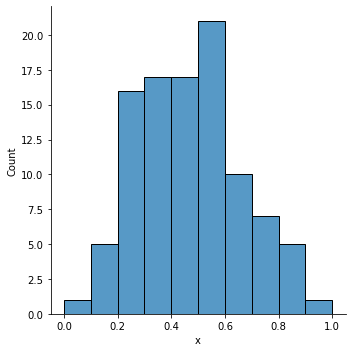

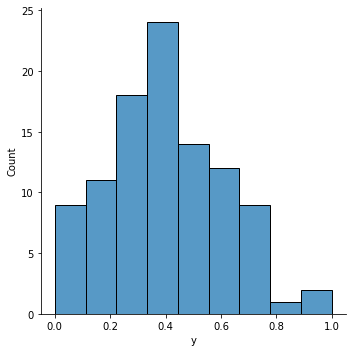

In [7]:
#check if the data is normally distributed
# sns.displot(df['x'])
# sns.displot(df['y'])

#normalize the data for both x and y
scaler = MinMaxScaler()
df_normalized['x'] = scaler.fit_transform(df[['x']])
df_normalized['y'] = scaler.fit_transform(df[['y']])
df_normalized.head()

sns.displot(df_normalized['x'])
sns.displot(df_normalized['y'])

# df_normalized.skew()
df_normalized.kurtosis()


#the print out of kurtosis between -2 and 2 dictates its within acceptable range for normal univariate distribution
#but the non zero shows that there is bias

<AxesSubplot:>

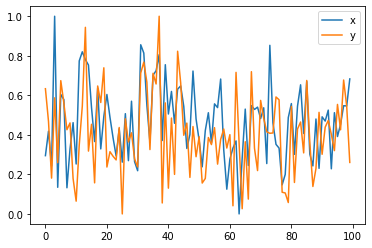

In [8]:
#take the data from problem1.csv and normalize it
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.head()

#plot the normalized data
df_normalized.plot()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.193
Model:                            OLS   Adj. R-squared (uncentered):              0.185
Method:                 Least Squares   F-statistic:                              23.69
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                    4.28e-06
Time:                        04:56:26   Log-Likelihood:                         -160.49
No. Observations:                 100   AIC:                                      323.0
Df Residuals:                      99   BIC:                                      325.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

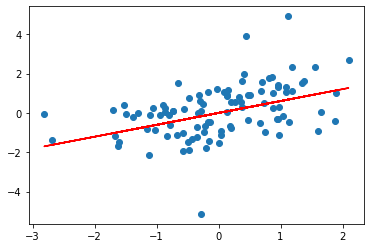

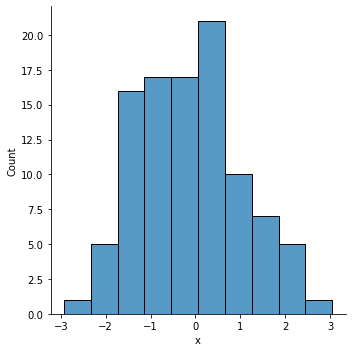

In [9]:

from sklearn.linear_model import LinearRegression


# Read in the data from a CSV file
data = pd.read_csv('problem2.csv')

# Split the data into the predictor variables (X) and the target variable (y)
x = data['x']
y = data['y']

# Create a LinearRegression object and fit it to the data
model = sm.OLS(y,x).fit()
print(model.summary())

# plot the linear regression
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.show()

#check if the data is normally distributed
sns.displot(df['x'])



In [10]:
error= model.resid
print(error)

# Plot the residuals
plt.scatter(X, error)
plt.xlabel('x')
plt.ylabel('error')
plt.show()

0    -0.718671
1     0.955120
2     1.147262
3     1.439575
4    -0.032478
        ...   
95   -1.470443
96   -1.575020
97    0.554699
98    0.522090
99   -0.802468
Length: 100, dtype: float64


NameError: name 'X' is not defined

[0.11986571 0.60518828]


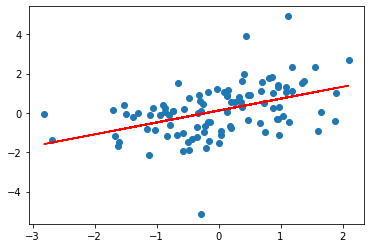

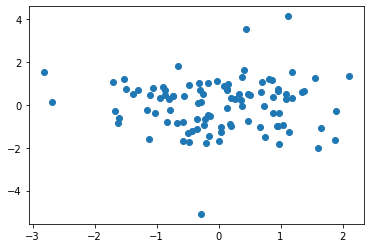

In [17]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

#create a function for Maximum Likelihood Estimator  assuminng normality using the data in problem2.csv
def neg_log_likelihood(params, x, y):
    a, b = params
    yhat = a + b * x
    sigma = 1
    nll = -np.sum(scipy.stats.norm.logpdf(y, loc=yhat, scale=sigma))
    return nll

#read in the data from problem2.csv
data = pd.read_csv('problem2.csv')

#split the data into the predictor variables (X) and the target variable (y)
x = data['x']
y = data['y']

#set the initial values for a and b
initial_guess = [0, 0]

#use the minimize function to find the values of a and b that minimize the negative log likelihood
res = minimize(neg_log_likelihood, initial_guess, args=(x, y), method='Nelder-Mead')

#print the values of a and b
print(res.x)

#plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, res.x[0] + res.x[1] * X, 'r')
plt.show()

#calculate the error terms
error = y - (res.x[0] + res.x[1] * X)

#plot the error terms
plt.scatter(X, error)
plt.show()


In [12]:
from scipy.optimize import minimize

import numpy as np
import matplotlib.pyplot as plt
#create a function for Maximum Likelihood Estimator using the data in problem2.csv and fit using the assumption of a T distribution of the errors
def neg_log_likelihood_stat(params, x, y):
    a, b = params
    yhat = a + b * x
    sigma = 1
    nll = -np.sum(scipy.stats.t.logpdf(y, loc=yhat, scale=sigma))
    return nll

#read in the data from problem2.csv
data = pd.read_csv('problem2.csv')

#split the data into the predictor variables (X) and the target variable (y)
X = data['x']
y = data['y']

#set the initial values for a and b
initial_guess = [0, 0]

#use the minimize function to find the values of a and b that minimize the negative log likelihood
res = minimize(neg_log_likelihood_stat, initial_guess, args=(X, y), method='Nelder-Mead')

print(res.x)

#plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, res.x[0] + res.x[1] * X, 'r')
plt.show()

#calculate the error terms
error = y - (res.x[0] + res.x[1] * X)

#plot the error terms
plt.scatter(X, error)
plt.show()

TypeError: _parse_args() missing 1 required positional argument: 'df'

KeyError: 'x'

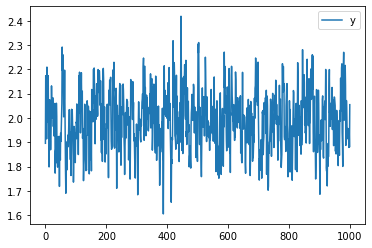

In [16]:
#using the data from ar1.csv create an autocorrelation
df_autocorrel = pd.read_csv('ar1.csv')
df_autocorrel.head()

#plot the data
df_autocorrel.plot()

#calculate the autocorrelation
df_autocorrel['x'].autocorr(lag=1)



KeyError: 'column_name'